In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

Text(0, 0.5, 'Decoder Accuracy')

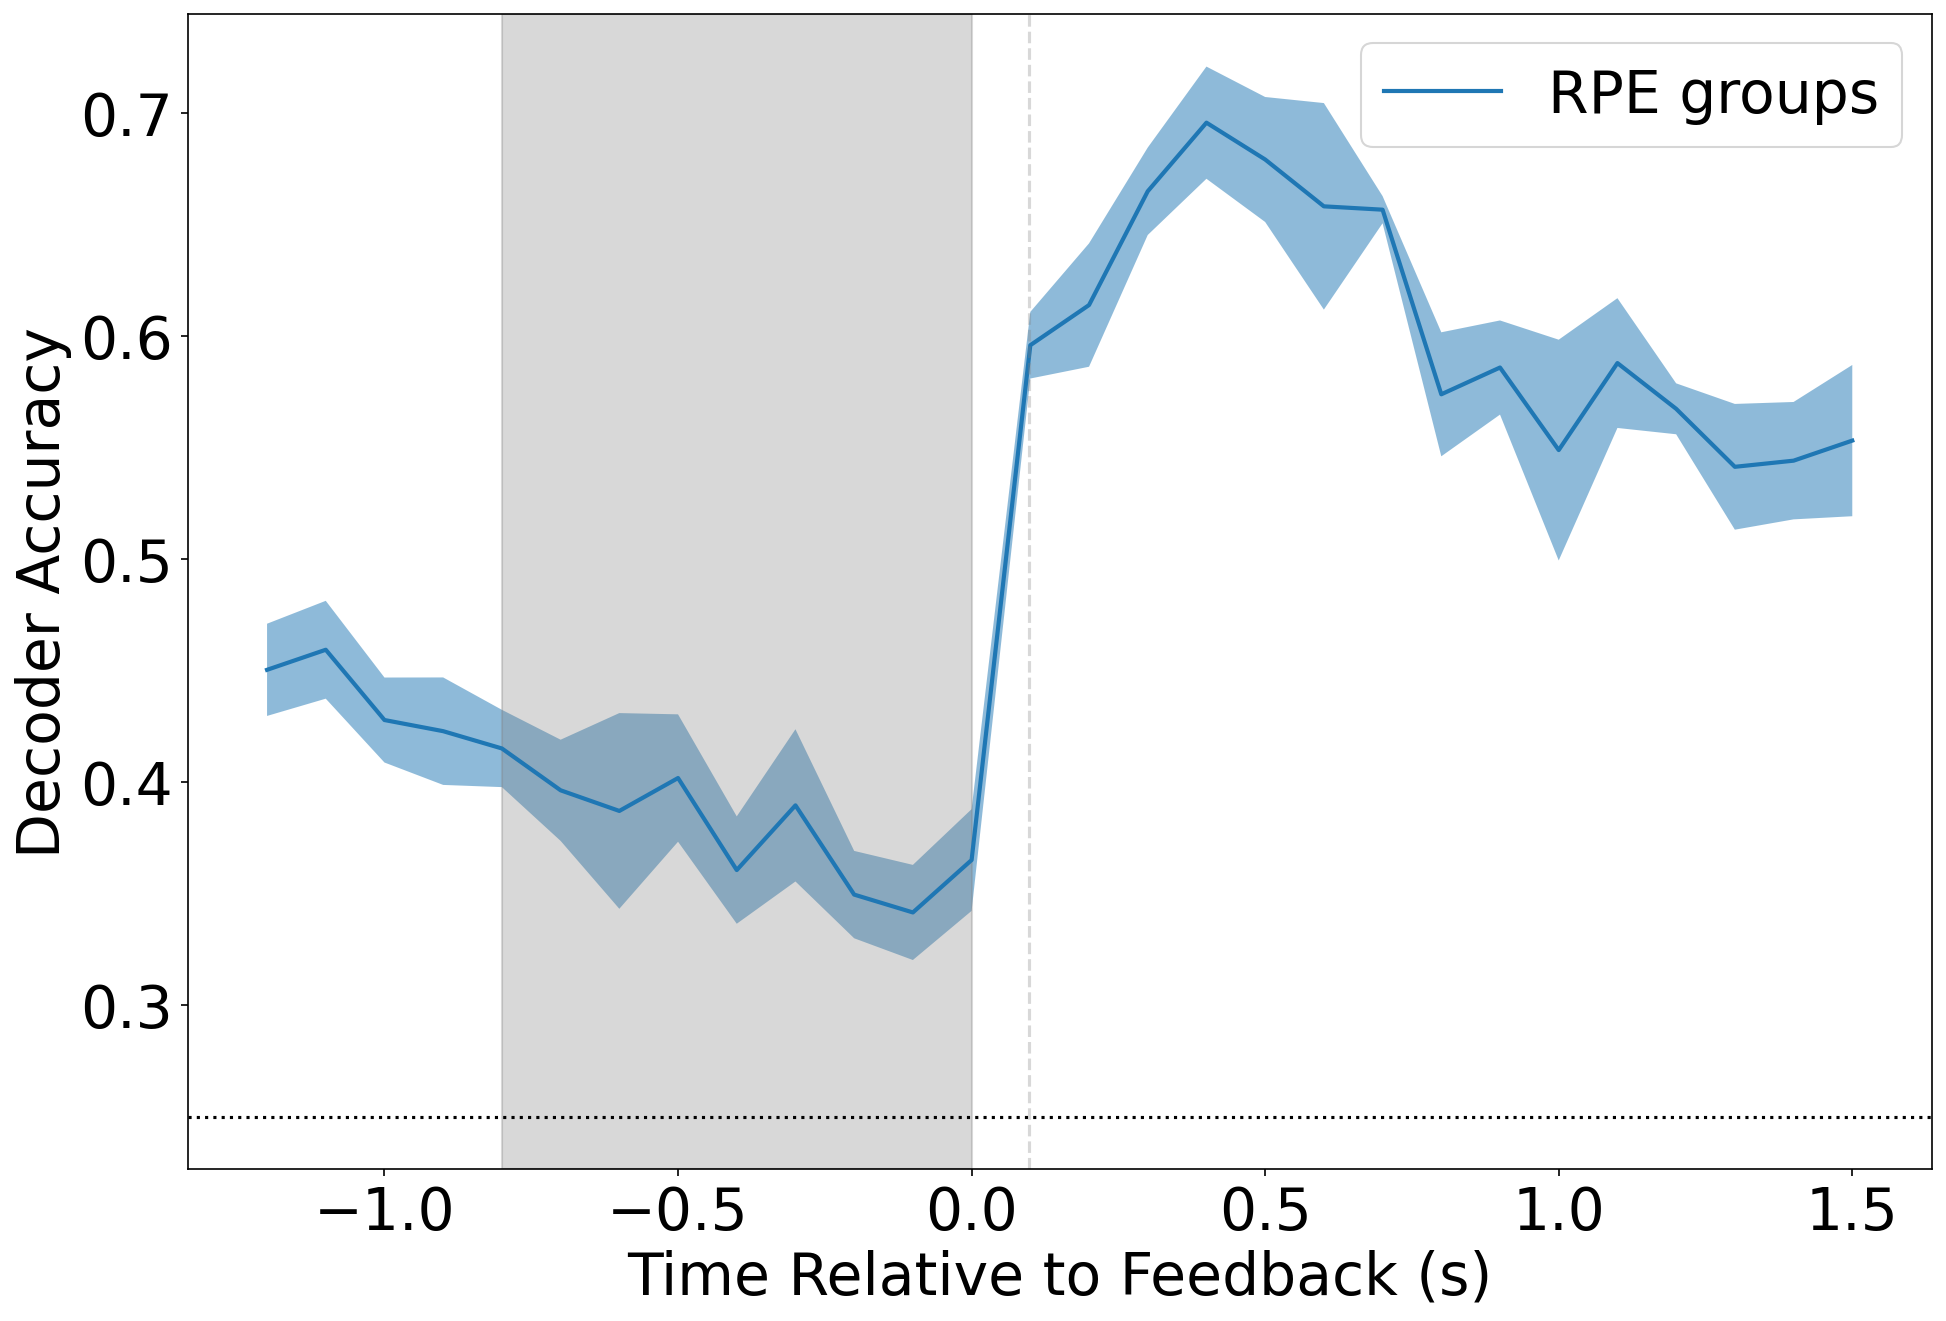

In [27]:
# matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
test_accs = np.load(os.path.join(OUTPUT_DIR, f"rpe_groups_test_accs.npy"))

# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    test_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"RPE groups",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

In [28]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)
positions = positions[positions.manual_structure != "unknown"]

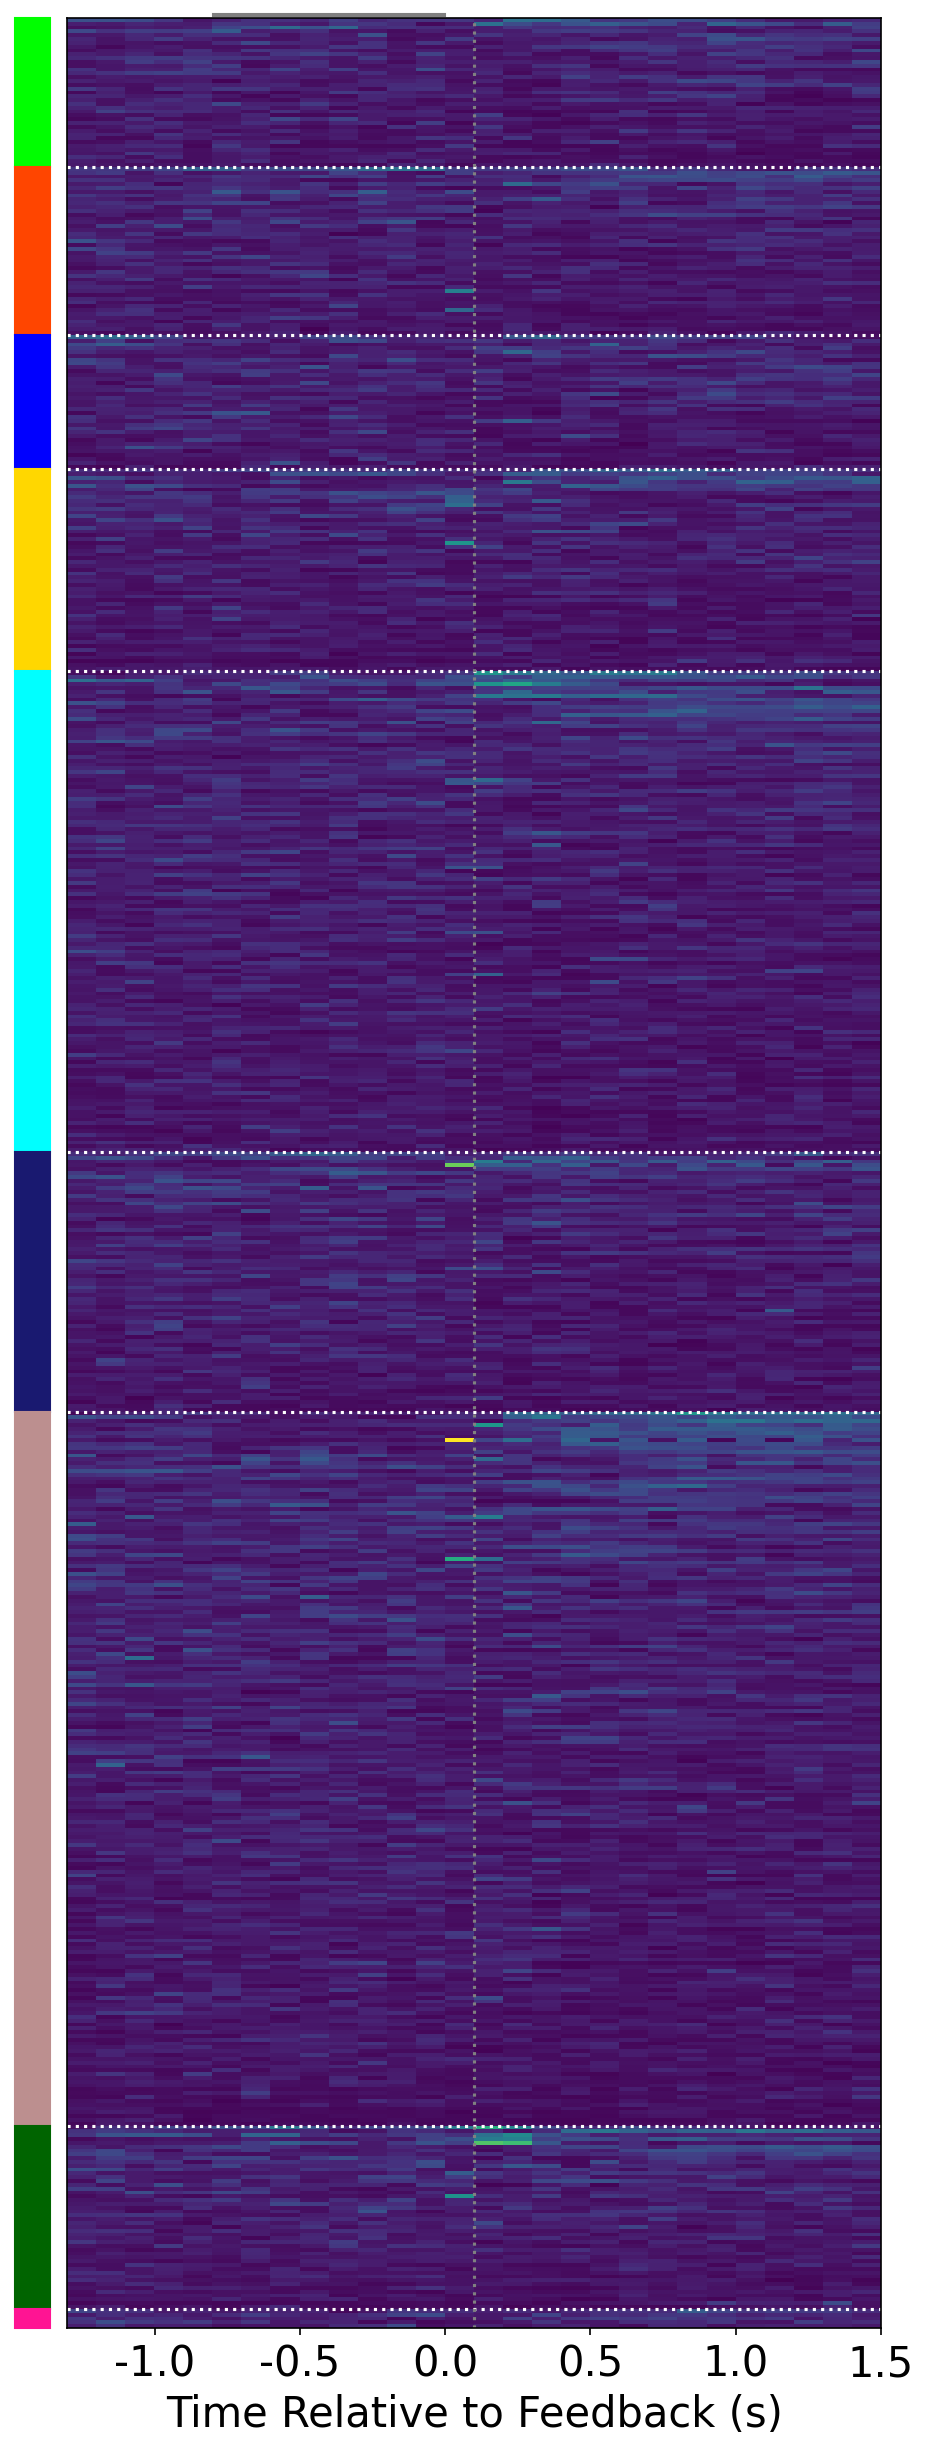

In [29]:
models = np.load(os.path.join(OUTPUT_DIR, f"rpe_groups_models.npy"), allow_pickle=True)
num_neurons = models[0, 0].coef_.shape[1]
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=num_neurons, num_classes=4)

norm_weights = weights / np.sum(weights, axis=0)

means = np.mean(norm_weights, axis=1)
rpe_ordering_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7, 20), dpi=150, sharex=True)
visualization_utils.visualize_weights(
    positions, 
    norm_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=rpe_ordering_df,
    ax=ax
)
# set_title(f"{feature_dim} Low Abs RPE")

### What about confidence?

Text(0, 0.5, 'Decoder Accuracy')

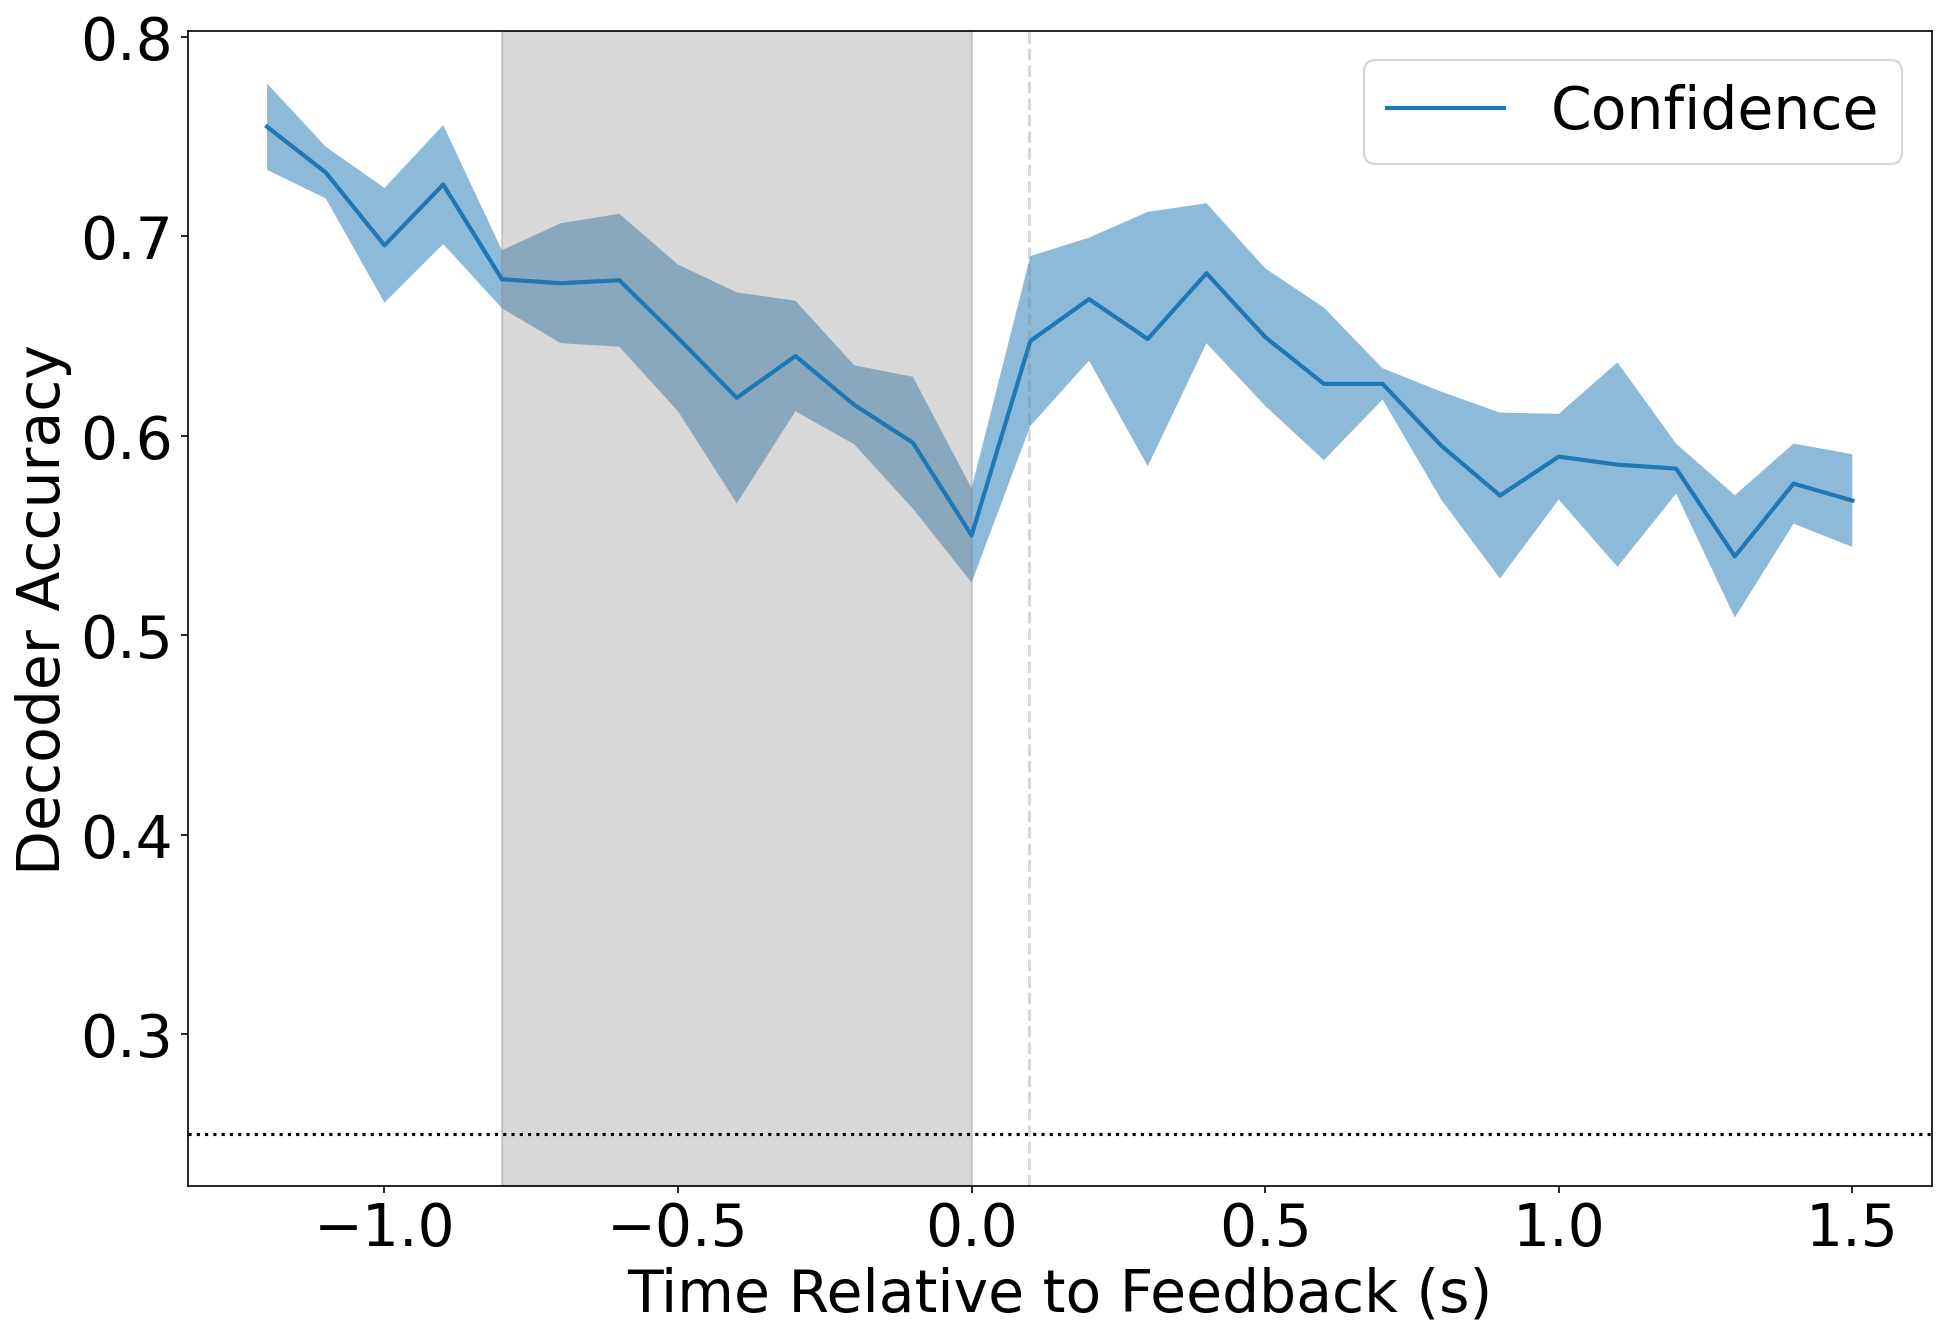

In [30]:
# matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
test_accs = np.load(os.path.join(OUTPUT_DIR, f"confidence_groups_test_accs.npy"))

# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    test_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Confidence",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

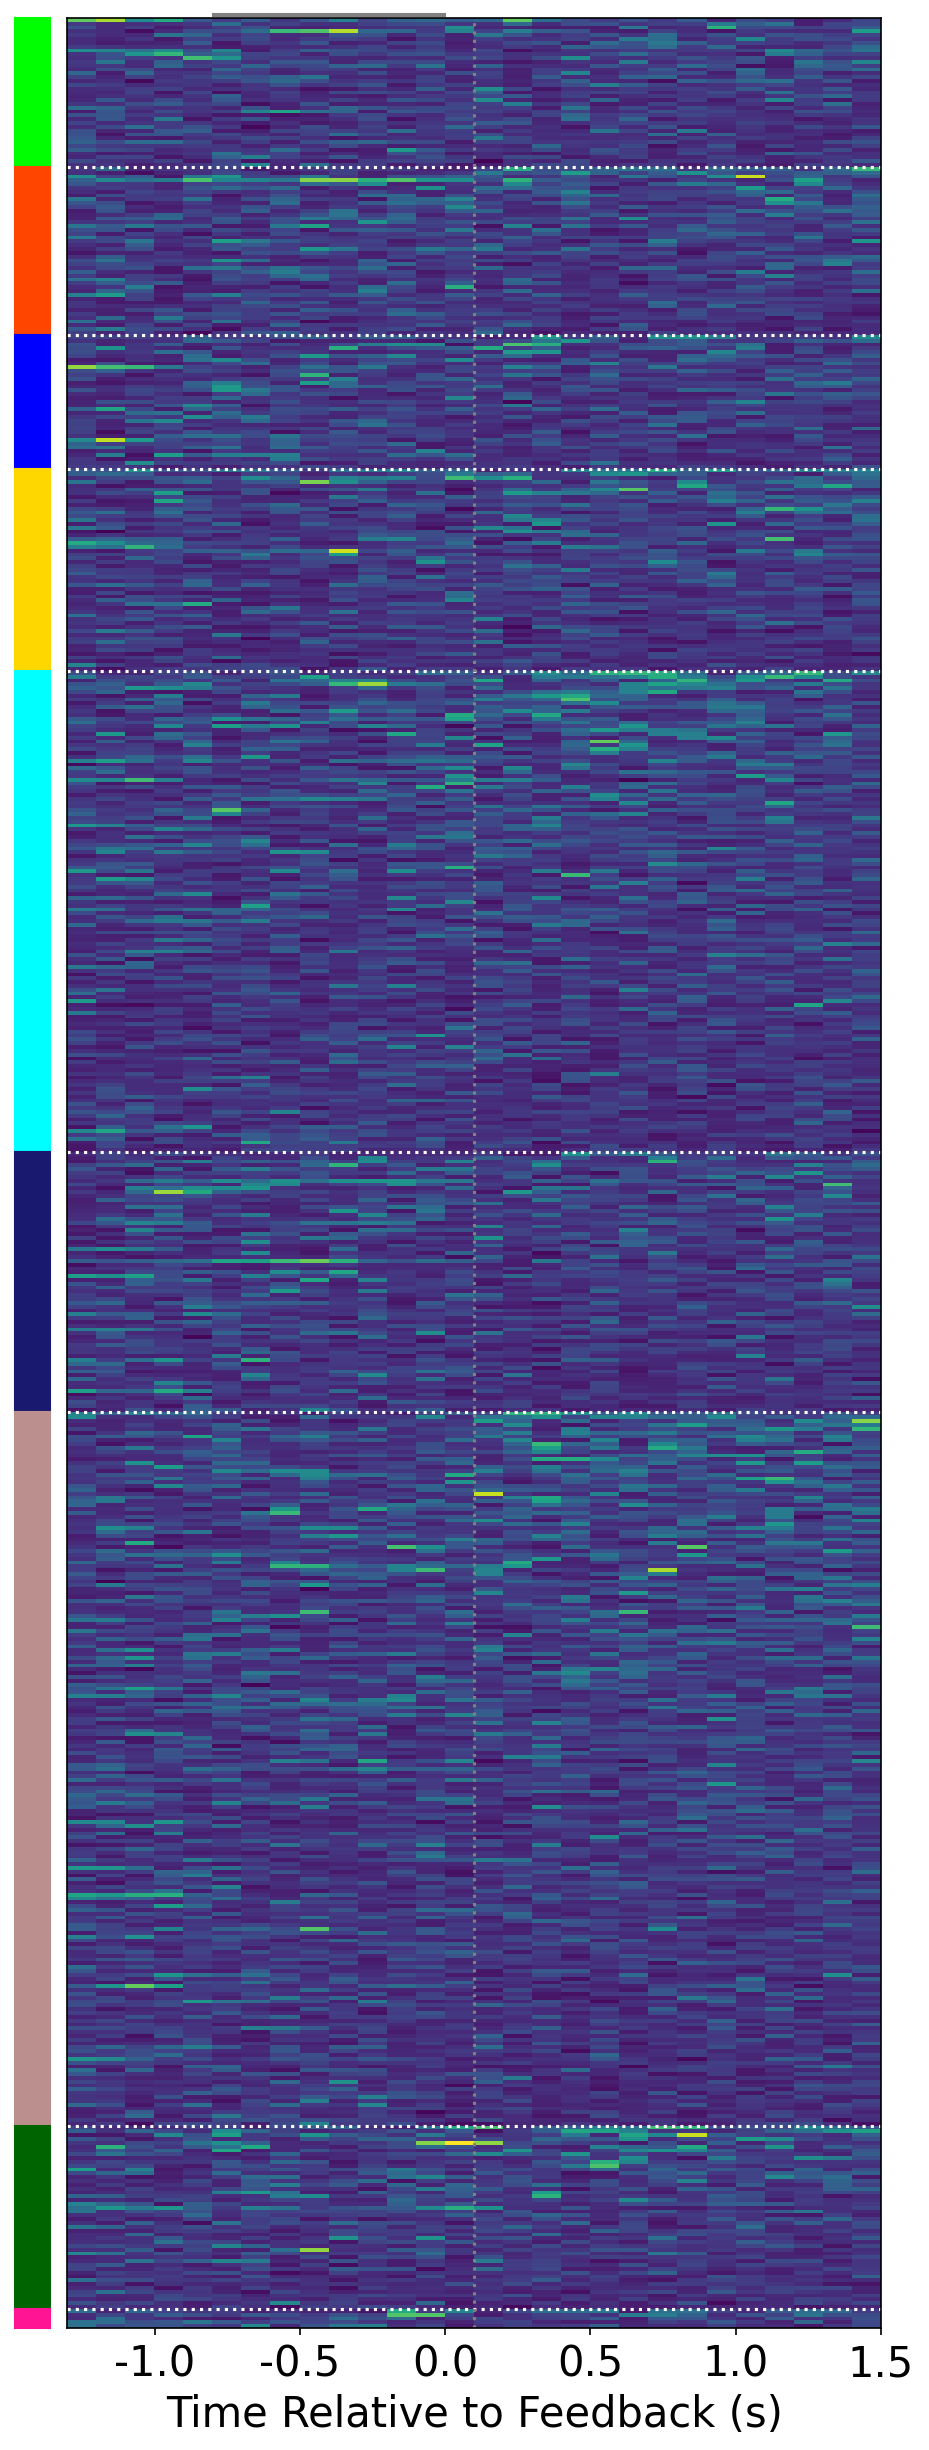

In [32]:
models = np.load(os.path.join(OUTPUT_DIR, f"confidence_groups_models.npy"), allow_pickle=True)
num_neurons = models[0, 0].coef_.shape[1]
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=num_neurons, num_classes=2)

norm_weights = weights / np.sum(weights, axis=0)

means = np.mean(norm_weights[:, 13:], axis=1)
ordering_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7, 20), dpi=150, sharex=True)
visualization_utils.visualize_weights(
    positions, 
    norm_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=ordering_df,
    ax=ax
)
# set_title(f"{feature_dim} Low Abs RPE")

In [8]:
norm_weights.shape

(634, 28)